## Python for Potholes: Using Geospatial Data in Python to Create Choropleth Map of Potholes in Minneapolis


In [41]:
# Import the necessary modules 

import geopandas 
import pandas as pd 
import matplotlib.pyplot as plt 


In [42]:
# Import 311 data file
citygripes = geopandas.read_file("data/Public_311_2019_YTD/Public_311_2019_YTD.shp") 
citygripes.head(10)

,CASEID,OBJECTID,SUBJECTNAM,REASONNAME,TYPENAME,TITLE,OPENEDDATE,CASESTATUS,CLOSEDDATE,XCOORD,YCOORD,LastUpdate,geometry
0,101004291617,1001,Vehicles and Commuting,Traffic Control,Abandoned Vehicle,Abandoned Vehicle,2019-01-28T13:13:50.000Z,0,2019-01-28T13:28:24.000Z,-1.037739e+07,5.613538e+06,2019-01-28T21:00:26.000Z,POINT (-93.22165754127802 44.94926370829523)
1,101004291627,1002,Vehicles and Commuting,Traffic Control,Parking Violation Complaint,Parking Violation Complaint,2019-01-28T13:21:34.000Z,0,2019-01-28T13:27:53.000Z,-1.038711e+07,5.618487e+06,2019-01-28T21:00:26.000Z,POINT (-93.30898518831202 44.98071843566085)
2,101004282359,1003,Vehicles and Commuting,Traffic Control,Abandoned Vehicle,Abandoned Vehicle,2019-01-02T15:29:06.000Z,0,2019-01-02T21:27:08.000Z,-1.038338e+07,5.606342e+06,2019-01-03T21:00:25.000Z,POINT (-93.27552695495632 44.90349944868328)
3,101004282360,1004,Sidewalks,Snow & Ice,Sidewalk Snow & Ice Complaint,Sidewalk Snow & Ice Complaint,2019-01-02T15:29:08.000Z,0,2019-01-03T07:43:10.000Z,-1.038588e+07,5.614104e+06,2019-01-03T21:00:25.000Z,POINT (-93.29798519099553 44.95286436955849)
4,101004287972,1005,Animal Related,Animal Control,Animal Complaint - Public Health,Animal Complaint - Public Health,2019-01-16T15:29:15.000Z,0,2019-01-16T17:58:28.000Z,-1.038234e+07,5.621577e+06,2019-01-16T21:00:24.000Z,POINT (-93.26614611614221 45.00035395223834)
5,101004282362,1006,Sidewalks,Snow & Ice,Sidewalk Snow & Ice Complaint,Sidewalk Snow & Ice Complaint,2019-01-02T15:29:42.000Z,0,2019-01-03T07:44:10.000Z,-1.038588e+07,5.614104e+06,2019-01-03T21:00:25.000Z,POINT (-93.29798519099553 44.95286436955849)
6,101004282363,1007,Sidewalks,Snow & Ice,Sidewalk Snow & Ice Complaint,Sidewalk Snow & Ice Complaint,2019-01-02T15:30:09.000Z,0,2019-01-03T07:45:02.000Z,-1.038588e+07,5.614104e+06,2019-01-03T21:00:25.000Z,POINT (-93.29798519099553 44.95286436955849)
7,101004282364,1008,Sidewalks,Snow & Ice,Sidewalk Snow & Ice Complaint,Sidewalk Snow & Ice Complaint,2019-01-02T15:30:37.000Z,0,2019-01-03T07:45:22.000Z,-1.038588e+07,5.614104e+06,2019-01-03T21:00:25.000Z,POINT (-93.29798519099553 44.95286436955849)
8,101004284089,1009,Vehicles and Commuting,Traffic Control,Abandoned Vehicle,Abandoned Vehicle,2019-01-07T09:35:26.000Z,0,2019-01-10T14:17:01.000Z,-1.038003e+07,5.610308e+06,2019-01-10T21:00:29.000Z,POINT (-93.24542986615251 44.92872717224967)
9,101004284091,1010,Property,Commercial Property,Commercial/Mixed Conditions Complaint,Commercial/Mixed Conditions Complaint,2019-01-07T09:37:25.000Z,0,2019-01-08T12:01:34.000Z,-1.038359e+07,5.608312e+06,2019-01-08T21:00:24.000Z,POINT (-93.27734471030676 44.91602885616702)


In [43]:
# Filter data to show only needed columns
citygripes = citygripes[['TYPENAME', 'geometry']]
citygripes.head(10)

,TYPENAME,geometry
0,Abandoned Vehicle,POINT (-93.22165754127802 44.94926370829523)
1,Parking Violation Complaint,POINT (-93.30898518831202 44.98071843566085)
2,Abandoned Vehicle,POINT (-93.27552695495632 44.90349944868328)
3,Sidewalk Snow & Ice Complaint,POINT (-93.29798519099553 44.95286436955849)
4,Animal Complaint - Public Health,POINT (-93.26614611614221 45.00035395223834)
5,Sidewalk Snow & Ice Complaint,POINT (-93.29798519099553 44.95286436955849)
6,Sidewalk Snow & Ice Complaint,POINT (-93.29798519099553 44.95286436955849)
7,Sidewalk Snow & Ice Complaint,POINT (-93.29798519099553 44.95286436955849)
8,Abandoned Vehicle,POINT (-93.24542986615251 44.92872717224967)
9,Commercial/Mixed Conditions Complaint,POINT (-93.27734471030676 44.91602885616702)


In [44]:
# Filter to show only pothole data
potholes = citygripes[(citygripes['TYPENAME'] == 'Pothole') | (citygripes['TYPENAME']== 'Pothole - Open311')]
potholes.head(10)

,TYPENAME,geometry
135,Pothole - Open311,POINT (-93.24800373437591 44.93953888521516)
137,Pothole - Open311,POINT (-93.28047149607914 44.95553322115808)
141,Pothole - Open311,POINT (-93.24448708695675 44.98331262826795)
143,Pothole,POINT (-93.21391146739774 44.95986279300047)
148,Pothole,POINT (-93.22708179084741 44.94045397802513)
151,Pothole,POINT (-93.31628604545939 45.04760200967644)
164,Pothole - Open311,POINT (-93.22762252993606 44.93684672798196)
165,Pothole - Open311,POINT (-93.27728504779887 44.92507025220657)
187,Pothole,POINT (-93.29131597076544 44.94472859759366)
225,Pothole - Open311,POINT (-93.22744066600679 44.93593842839003)


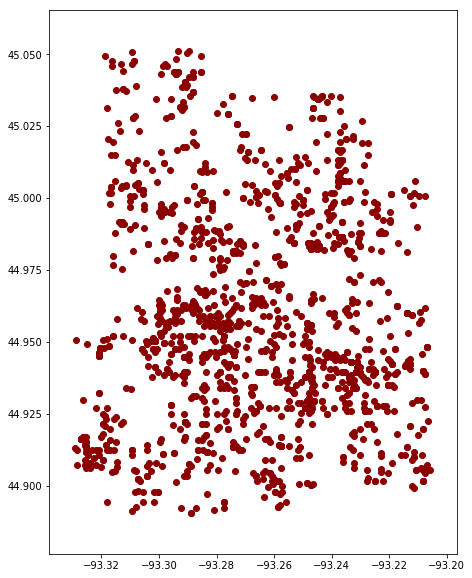

In [45]:
# Spatially plot potholes
potholes.plot(figsize=(20,10), color='darkred')

In [46]:
# Import neighborhood data file
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods.shp")
neighborhoods.head()

,OBJECTID,INT_REFNO,PREFIX,UDI,SYMBOL_NAM,BDNAME,BDNUM,TEXT_NBR,Shape__Are,Shape__Len,geometry
0,1,-2144139700,REFNO,23103.00,WARDAREA,Victory,3,03,0.000202,0.068721,"POLYGON ((-93.3193815366222 45.042016303131, -..."
1,2,0,REFNO,23108.00,WARDAREA,Humboldt Industrial Area,8,08,0.000081,0.049060,"POLYGON ((-93.3193860506565 45.0421783244357, ..."
2,3,-2144133700,REFNO,23163.00,WARDAREA,Howe,63,63,0.000314,0.082525,"POLYGON ((-93.2010422053324 44.941551562735, -..."
3,4,-2144133600,REFNO,23164.00,WARDAREA,Hiawatha,64,64,0.000366,0.096906,"POLYGON ((-93.20495120363 44.9306997821572, -9..."
4,5,-2144134800,REFNO,23152.00,WARDAREA,Phillips West,90,90,0.000113,0.045801,"POLYGON ((-93.2625807584751 44.9609082135737, ..."


In [47]:
# Filter data to show only needed columns
neighborhoods = neighborhoods[['BDNAME', 'geometry']]
neighborhoods.head()

,BDNAME,geometry
0,Victory,"POLYGON ((-93.3193815366222 45.042016303131, -..."
1,Humboldt Industrial Area,"POLYGON ((-93.3193860506565 45.0421783244357, ..."
2,Howe,"POLYGON ((-93.2010422053324 44.941551562735, -..."
3,Hiawatha,"POLYGON ((-93.20495120363 44.9306997821572, -9..."
4,Phillips West,"POLYGON ((-93.2625807584751 44.9609082135737, ..."


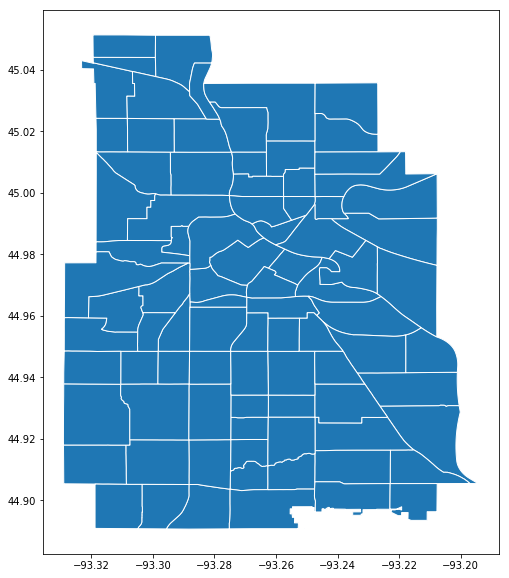

In [48]:
# Spatially plot neighborhoods
neighborhoods.plot(edgecolor='white', figsize=(20,10))

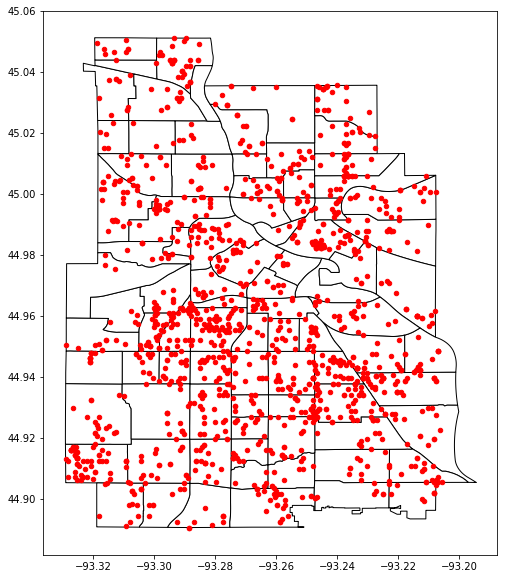

In [49]:
#Overlay maps
base = neighborhoods.plot(color='white', edgecolor='black', figsize = (20,10))
potholes.plot(ax=base, color='red', markersize=20);

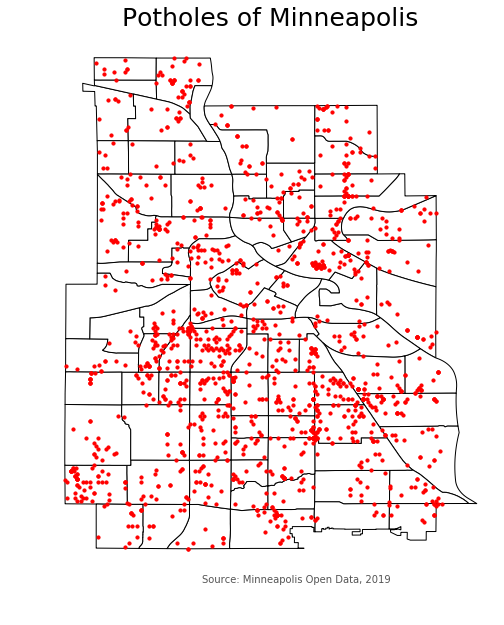

In [50]:
#Plot again on a "fig" so I can add title and annotations
fig, ax = plt.subplots(figsize = (10,10)) 
ax.set_aspect('equal')
neighborhoods.plot(ax=ax, color='white', edgecolor='black', figsize = (20,10))
potholes.plot(ax=ax, markersize=10, color='red', figsize = (20,10))

# Clean up the map, add title and annotations
ax.axis('off')
ax.set_title('Potholes of Minneapolis', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('Source: Minneapolis Open Data, 2019',
           xy=(.4, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
plt.show()

At this point I have mapped each individual pothole. What I really wanted was a choropleth to represent the variability across neighborhoods. The problem is I have two datasets.

In [51]:
# Aggregate datasets on neighborhood name (BDNAME)
potholes_with_neighborhood = geopandas.sjoin(potholes, neighborhoods, how="inner", op='within')
potholes_with_neighborhood.head(10)

,TYPENAME,geometry,index_right,BDNAME
135,Pothole - Open311,POINT (-93.24800373437591 44.93953888521516),55,Powderhorn Park
591,Pothole,POINT (-93.25620653600117 44.93684371506597),55,Powderhorn Park
1264,Pothole - Open311,POINT (-93.25939866073573 44.93955805111348),55,Powderhorn Park
1529,Pothole - Open311,POINT (-93.25051175249577 44.93592874976832),55,Powderhorn Park
1920,Pothole,POINT (-93.24803508737595 44.94474165473613),55,Powderhorn Park
2239,Pothole,POINT (-93.26074383397477 44.94654400529417),55,Powderhorn Park
4250,Pothole - Open311,POINT (-93.25554899616264 44.93413581863933),55,Powderhorn Park
5977,Pothole - Open311,POINT (-93.2607190853887 44.9447319032077),55,Powderhorn Park
7361,Pothole - Open311,POINT (-93.24800373437591 44.93953888521516),55,Powderhorn Park
10816,Pothole - Open311,POINT (-93.25935670671701 44.93594719701642),55,Powderhorn Park


In [52]:
#Summarize & prepare pothole data per neighborhood
data_for_map = potholes_with_neighborhood['BDNAME'].value_counts()#Summarize pothole data based on neigborhood
data_for_map.to_frame()#Convert to dataframe
data_for_map = data_for_map.reset_index()#Add an index
data_for_map = data_for_map.rename(index=str, columns={"index" : "Neighborhoods", "BDNAME" : "Pothole_Count"})#Rename columns
data_for_map.head()


,Neighborhoods,Pothole_Count
0,Marcy Holmes,60
1,Fulton,56
2,Whittier,56
3,Standish,50
4,Howe,45


In [53]:
# Aggregate summarized pothold counts with neighborhood polygon geometry:
merged = neighborhoods.set_index('BDNAME').join(data_for_map.set_index('Neighborhoods'))
merged['Pothole_Count'].fillna(0.0, inplace=True)
merged.head()


,geometry,Pothole_Count
BDNAME,,
Victory,"POLYGON ((-93.3193815366222 45.042016303131, -...",10.0
Humboldt Industrial Area,"POLYGON ((-93.3193860506565 45.0421783244357, ...",2.0
Howe,"POLYGON ((-93.2010422053324 44.941551562735, -...",45.0
Hiawatha,"POLYGON ((-93.20495120363 44.9306997821572, -9...",18.0
Phillips West,"POLYGON ((-93.2625807584751 44.9609082135737, ...",7.0


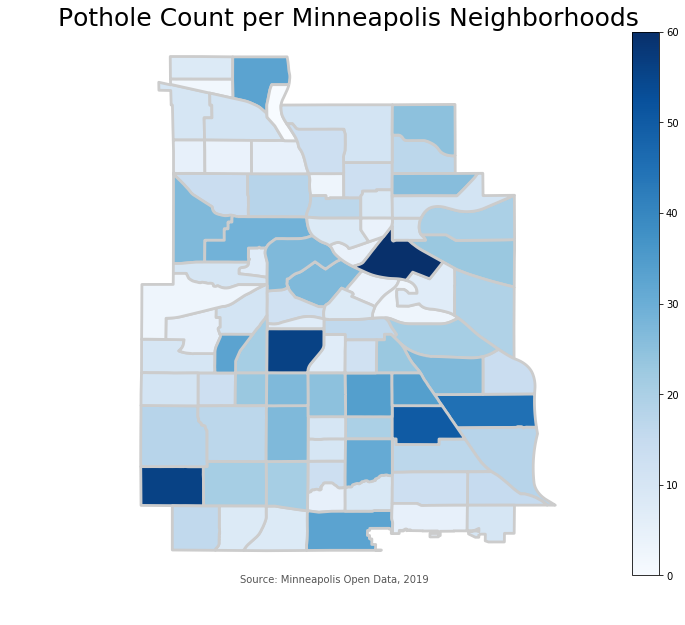

In [54]:
#Create choropleth

# Set a variable that will call the column we want to visualise on the map
variable = 'Pothole_Count'

# Set the range for the choropleth
vmin, vmax = 0,60

# Create figur and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=2.8, ax=ax, edgecolor='0.8')

#Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Pothole Count per Minneapolis Neighborhoods', 
             fontdict={'fontsize': '25',
                      'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: Minneapolis Open Data, 2019',
           xy=(.35, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
        
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm)
